### Librerias

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import cv2
import os
import re
import sys
import pickle
from matplotlib import pyplot as plt
from numpy.testing import assert_allclose

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
sess = tf.compat.v1.Session(config=config)
config.gpu_options.per_process_gpu_memory_fraction = 0.9

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import class_weight

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import InputLayer, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

### Cargando las imagenes del conjunto de entrenamiento

In [3]:
%%time
#Lista de categorías
directorio = os.path.join(os.getcwd(), "F:/sonidos aves/data_sliding_short/train")
categorias = os.listdir(directorio)

#Listas de imagenes y etiquetas del modelo
imagenes = []
etiquetas = []

#Construcción de las listas
for i in range(len(categorias)):
    cat = os.listdir(directorio+"/"+categorias[i])
    for j in range(len(cat)):
        img = cv2.imread(directorio+"/"+categorias[i]+"/"+cat[j])
        #resized = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.equalizeHist(gray)
        imagenes.append(hist)
        etiquetas.append(categorias.index(categorias[i]))
    print("Imagenes de la categoria " + categorias[i] + " cargadas!")
        
#Listas convertidas en variables
X_train = np.array(imagenes, dtype=np.uint8)         
y_train = np.array(etiquetas)

Imagenes de la categoria Ammodramus humeralis_Grassland Sparrow cargadas!
Imagenes de la categoria Ara severus_Chestnut-fronted Macaw cargadas!
Imagenes de la categoria Aramus guarauna_Limpkin cargadas!
Imagenes de la categoria Bubo virginianus_Great Horned Owl cargadas!
Imagenes de la categoria Bubulcus ibis_Cattle Egret cargadas!
Imagenes de la categoria Buteo nitidus_Gray-lined Hawk cargadas!
Imagenes de la categoria Buteo platypterus_Broad-winged Hawk cargadas!
Imagenes de la categoria Campephilus melanoleucos_Crimson-crested Woodpecker cargadas!
Imagenes de la categoria Camptostoma obsoletum_Southern Beardless-Tyrannulet cargadas!
Imagenes de la categoria Catharus ustulatus_Swainson_s Thrush cargadas!
Imagenes de la categoria Chloroceryle amazona_Amazon Kingfisher cargadas!
Imagenes de la categoria Chlorophonia cyanea_Blue-naped Chlorophonia cargadas!
Imagenes de la categoria Chondrohierax uncinatus_Hook-billed Kite cargadas!
Imagenes de la categoria Chordeiles minor_Common Nighth

### Cargando las imagenes del conjunto de prueba

In [4]:
%%time
#Lista de categorías
directorio = os.path.join(os.getcwd(), "F:/sonidos aves/data_sliding_short/test")
categorias = os.listdir(directorio)

#Listas de imagenes y etiquetas del modelo
imagenes = []
etiquetas = []

#Construcción de las listas
for i in range(len(categorias)):
    cat = os.listdir(directorio+"/"+categorias[i])
    for j in range(len(cat)):
        img = cv2.imread(directorio+"/"+categorias[i]+"/"+cat[j])
        #resized = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.equalizeHist(gray)
        imagenes.append(hist)
        etiquetas.append(categorias.index(categorias[i]))
    print("Imagenes de la categoria " + categorias[i] + " cargadas!")
        
#Listas convertidas en variables
X_test = np.array(imagenes, dtype=np.uint8)         
y_test = np.array(etiquetas)

Imagenes de la categoria Ammodramus humeralis_Grassland Sparrow cargadas!
Imagenes de la categoria Ara severus_Chestnut-fronted Macaw cargadas!
Imagenes de la categoria Aramus guarauna_Limpkin cargadas!
Imagenes de la categoria Bubo virginianus_Great Horned Owl cargadas!
Imagenes de la categoria Bubulcus ibis_Cattle Egret cargadas!
Imagenes de la categoria Buteo nitidus_Gray-lined Hawk cargadas!
Imagenes de la categoria Buteo platypterus_Broad-winged Hawk cargadas!
Imagenes de la categoria Campephilus melanoleucos_Crimson-crested Woodpecker cargadas!
Imagenes de la categoria Camptostoma obsoletum_Southern Beardless-Tyrannulet cargadas!
Imagenes de la categoria Catharus ustulatus_Swainson_s Thrush cargadas!
Imagenes de la categoria Chloroceryle amazona_Amazon Kingfisher cargadas!
Imagenes de la categoria Chlorophonia cyanea_Blue-naped Chlorophonia cargadas!
Imagenes de la categoria Chondrohierax uncinatus_Hook-billed Kite cargadas!
Imagenes de la categoria Chordeiles minor_Common Nighth

### Cargando las imagenes del conjunto de validacion

In [5]:
%%time
#Lista de categorías
directorio = os.path.join(os.getcwd(), "F:/sonidos aves/data_sliding_short/val")
categorias = os.listdir(directorio)

#Listas de imagenes y etiquetas del modelo
imagenes = []
etiquetas = []

#Construcción de las listas
for i in range(len(categorias)):
    cat = os.listdir(directorio+"/"+categorias[i])
    for j in range(len(cat)):
        img = cv2.imread(directorio+"/"+categorias[i]+"/"+cat[j])
        #resized = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.equalizeHist(gray)
        imagenes.append(hist)
        etiquetas.append(categorias.index(categorias[i]))
    print("Imagenes de la categoria " + categorias[i] + " cargadas!")
        
#Listas convertidas en variables
X_val = np.array(imagenes, dtype=np.uint8)         
y_val = np.array(etiquetas)

Imagenes de la categoria Ammodramus humeralis_Grassland Sparrow cargadas!
Imagenes de la categoria Ara severus_Chestnut-fronted Macaw cargadas!
Imagenes de la categoria Aramus guarauna_Limpkin cargadas!
Imagenes de la categoria Bubo virginianus_Great Horned Owl cargadas!
Imagenes de la categoria Bubulcus ibis_Cattle Egret cargadas!
Imagenes de la categoria Buteo nitidus_Gray-lined Hawk cargadas!
Imagenes de la categoria Buteo platypterus_Broad-winged Hawk cargadas!
Imagenes de la categoria Campephilus melanoleucos_Crimson-crested Woodpecker cargadas!
Imagenes de la categoria Camptostoma obsoletum_Southern Beardless-Tyrannulet cargadas!
Imagenes de la categoria Catharus ustulatus_Swainson_s Thrush cargadas!
Imagenes de la categoria Chloroceryle amazona_Amazon Kingfisher cargadas!
Imagenes de la categoria Chlorophonia cyanea_Blue-naped Chlorophonia cargadas!
Imagenes de la categoria Chondrohierax uncinatus_Hook-billed Kite cargadas!
Imagenes de la categoria Chordeiles minor_Common Nighth

### Definiendo el modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 30)      300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 30)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 50)      37550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 50)        6

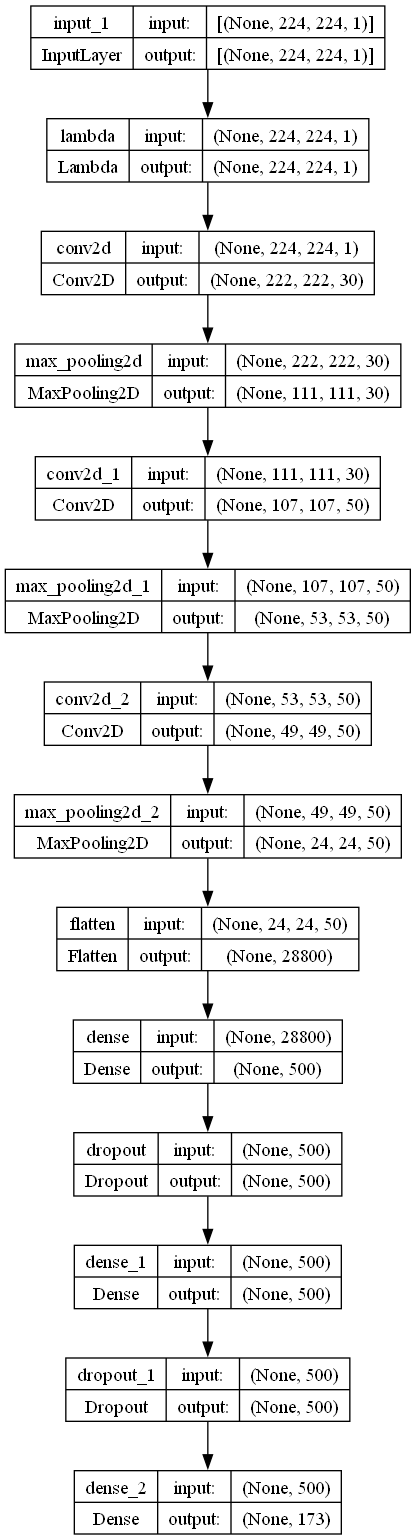

In [6]:
NB_CLASES = 173
NB_EPOCAS = 100
IM_SIZE = (224, 224, 1)
VERBOSE = 1
OPTIMIZADOR = Adam(learning_rate = 0.0001)
DROPOUT_1 = 0.70
DROPOUT_2 = 0.80
BATCH_SIZE = 128

def LeNet_model():
    model = Sequential()
    model.add(InputLayer(input_shape=IM_SIZE))
    model.add(Lambda(lambda x: x/255.0))
    model.add(Conv2D(30, (3, 3),  activation = "relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (5, 5), activation = "relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (5, 5), activation = "relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation = "relu"))
    model.add(Dropout(DROPOUT_1))
    model.add(Dense(500, activation = "relu"))
    model.add(Dropout(DROPOUT_2))
    model.add(Dense(NB_CLASES, activation = "softmax"))
    model.compile(OPTIMIZADOR, loss="categorical_crossentropy", metrics = ["accuracy"])
    return model

model = LeNet_model()
print(model.summary())
keras.utils.plot_model(model, show_shapes=True)

### Estableciendo el modelo

Epoch 1/100
378/378 [==============================] - ETA: 0s - loss: 4.7336 - accuracy: 0.0431
Epoch 1: val_loss improved from inf to 4.28653, saving model to F:/sonidos aves/definitivos/conv_completo\checkpoint.h5
378/378 [==============================] - 756s 2s/step - loss: 4.7336 - accuracy: 0.0431 - val_loss: 4.2865 - val_accuracy: 0.0882
Epoch 2/100
378/378 [==============================] - ETA: 0s - loss: 4.3059 - accuracy: 0.0771
Epoch 2: val_loss improved from 4.28653 to 4.01394, saving model to F:/sonidos aves/definitivos/conv_completo\checkpoint.h5
378/378 [==============================] - 752s 2s/step - loss: 4.3059 - accuracy: 0.0771 - val_loss: 4.0139 - val_accuracy: 0.1485
Epoch 3/100
378/378 [==============================] - ETA: 0s - loss: 4.1016 - accuracy: 0.1027
Epoch 3: val_loss improved from 4.01394 to 3.82460, saving model to F:/sonidos aves/definitivos/conv_completo\checkpoint.h5
378/378 [==============================] - 733s 2s/step - loss: 4.1016 - accu

Epoch 51: early stopping


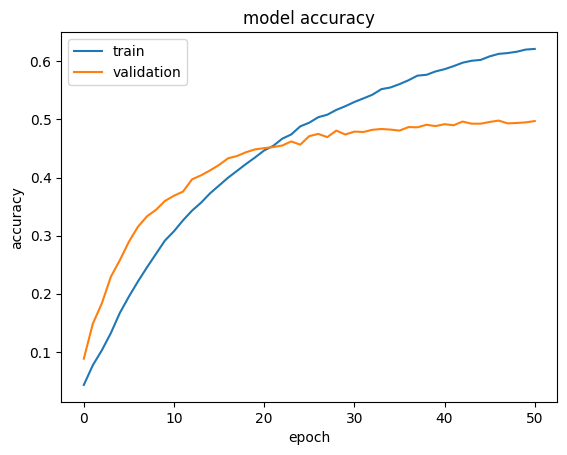

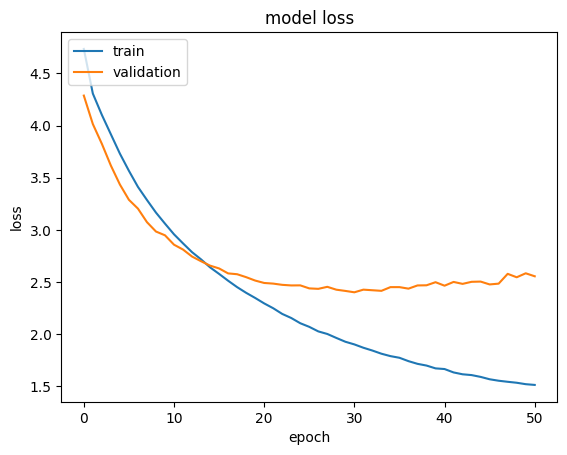

In [7]:
#Dummy de las etiquetas
y_train = to_categorical(y_train, NB_CLASES)
y_test = to_categorical(y_test, NB_CLASES)
y_val = to_categorical(y_val, NB_CLASES)

filepath = "F:/sonidos aves/definitivos/conv_completo/checkpoint.h5"

# Define callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', save_freq="epoch")

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 20, 
                          verbose = 1,
                          restore_best_weights = True)

callbacks_list = [
    checkpoint,
    earlystop,
]

## Train the model
history = model.fit(
    X_train, y_train,
    epochs=NB_EPOCAS,
     callbacks=callbacks_list,
    validation_data=(X_val, y_val),
    verbose = 1,
    batch_size = BATCH_SIZE,
)

# Save the training history
with open('F:/sonidos aves/definitivos/conv_completo/train_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

##Resumen de la precisión del modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('F:/sonidos aves/definitivos/conv_completo/train_accuracy.png')
plt.show()


##Resumen de la función de perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('F:/sonidos aves/definitivos/conv_completo/train_loss.png')
plt.show()

### Evaluación del conjunto de prueba

In [8]:
score = model.evaluate(X_test, y_test, verbose = 1)
print("Conjunto de prueba. Función de perdida: ", score[0])
print("conjunto de prueba. Precisión: ", score[1])

457/457 [==============================] - 51s 112ms/step - loss: 2.4356 - accuracy: 0.4575
Conjunto de prueba. Función de perdida:  2.4356093406677246
conjunto de prueba. Precisión:  0.4574751853942871


### Matriz de confusión

In [9]:
y_pred = model.predict(X_test)
reporte =classification_report(np.argmax(y_test, axis=1),  np.argmax(y_pred, axis=1))
print(reporte)
c = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
df = pd.DataFrame(c, index = categorias, columns = categorias)
df.to_excel('F:/sonidos aves/definitivos/conv_completo/confusion.xlsx', index = False)

457/457 [==============================] - 50s 109ms/step
              precision    recall  f1-score   support

           0       0.47      0.25      0.33       224
           1       0.53      0.51      0.52       180
           2       0.38      0.36      0.37       109
           3       1.00      0.05      0.09        65
           4       0.45      0.71      0.55       263
           5       0.32      0.19      0.23       140
           6       0.37      0.51      0.43        67
           7       0.65      0.72      0.68       273
           8       0.51      0.45      0.48        67
           9       0.90      0.46      0.61        80
          10       0.39      0.21      0.27       120
          11       0.50      0.06      0.11       117
          12       0.00      0.00      0.00        16
          13       0.72      0.28      0.40       326
          14       0.37      0.65      0.47       199
          15       0.83      0.29      0.43       547
          16       0.50

C:\Users\corvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\corvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\corvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


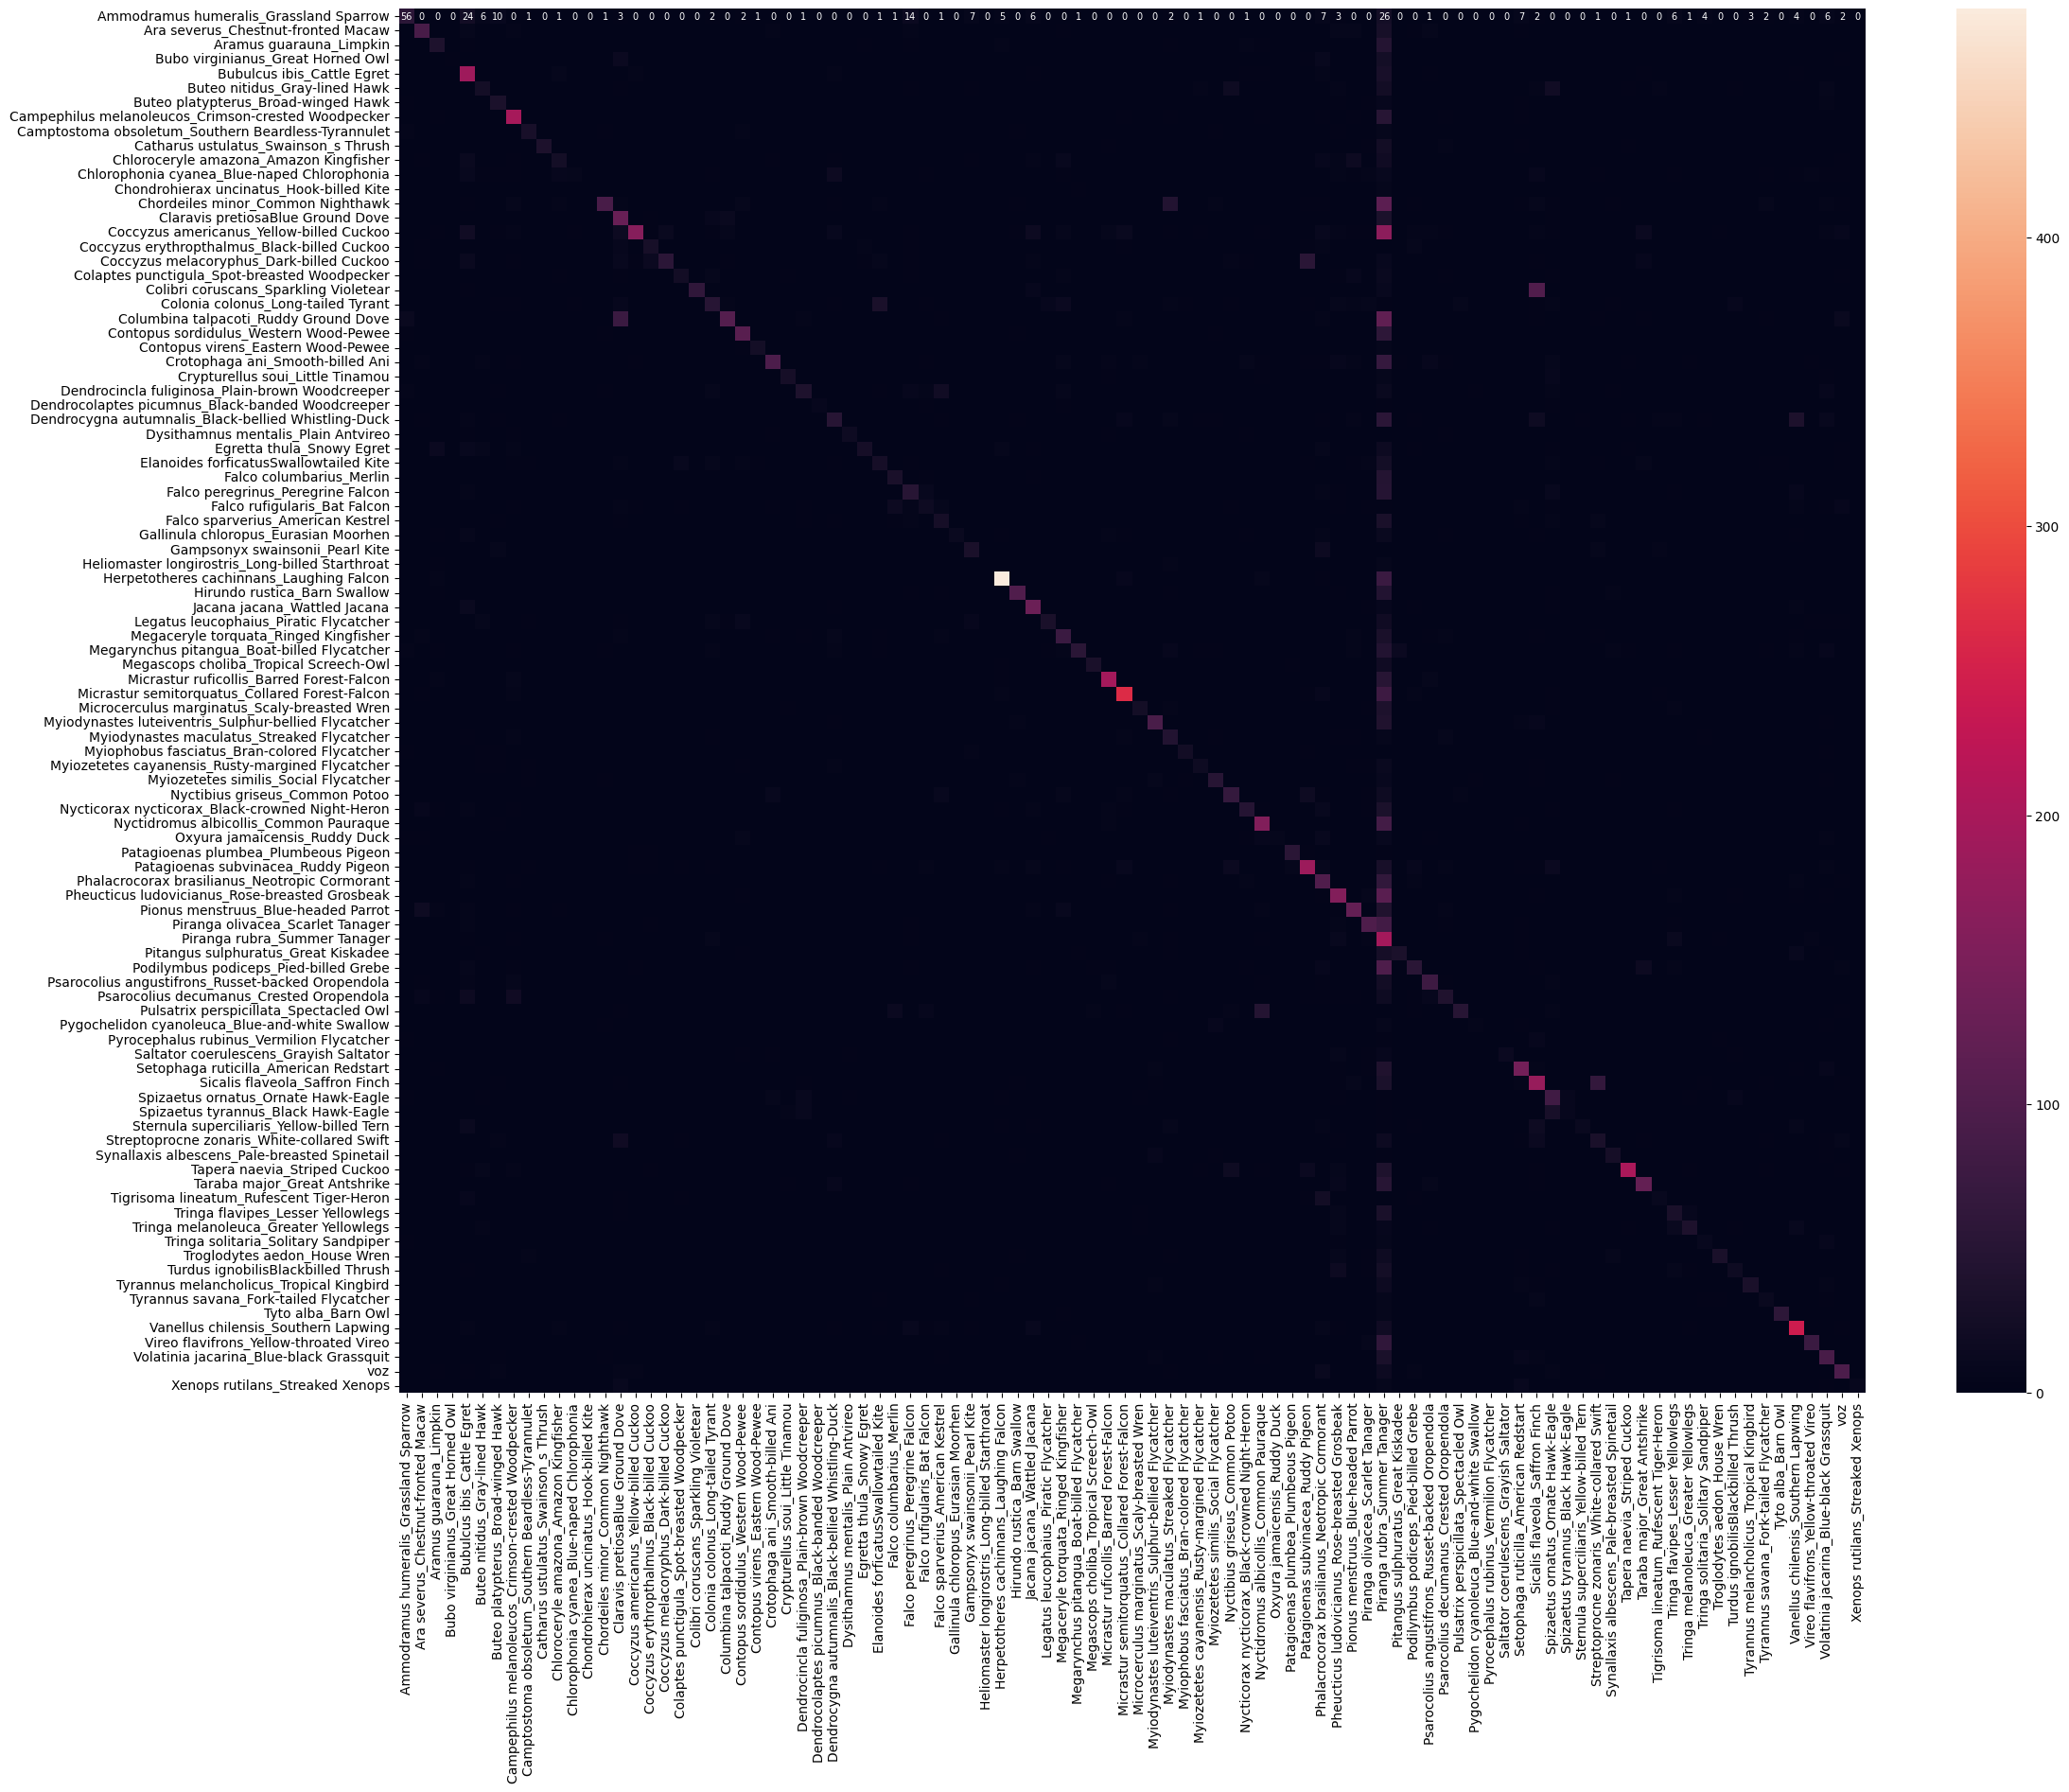

In [10]:
plt.figure(figsize = (25,19))
sns.heatmap(df, annot=True,annot_kws={"size": 7})
plt.savefig('F:/sonidos aves/definitivos/conv_completo/confusion.png')
plt.show()

### guardando el dataset con las clases etiquetadas

In [ ]:
report_data = []
lines = reporte.split('\n')
for line in lines[2:]:
    row = {}
    row_data = re.split(r'\s{2,}', line.strip())
    if len(row_data) != 5:
        continue
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
dataframe = pd.DataFrame.from_dict(report_data)
for i in range(len(categorias)):
    dataframe["class"][i] = categorias[i]
dataframe.to_excel('F:/sonidos aves/definitivos/conv_completo/classification_report.xlsx', index = False)
dataframe